### Contents
    01. Importing libraries and data
    02. Creating a bar chart, histogram, scatterplot and a line chart
    03. Histogram of the “order_hour_of_day” column
    04. Bar chart from the “loyalty_flag” column
    05. Line chart of prices to check the difference in expenditure
    06. Exploratory analysis of customer demographics
    07. Export

# Import Libraries 

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Import Data

In [2]:
# Set path 
path=r'/Users/aylaarreguin/07-15-2020 Instacart Basket Analysis/'

In [3]:
# Import latest version of Instacart data
df = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'full_instacart_data.pkl'))

In [4]:
# Check df
df.head()

,Order_id,Customer_id,Order_number,Orders_day_of_week,Order_time_of_day,Days_since_prior_order,Product_id,Add_to_cart_order,Reordered,Product_name,...,First_name,Surname,Gender,State,Age,Date_joined,#_of_dependants,Marital_status,Income,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [5]:
df.shape

(32404859, 33)

# Creating a bar chart, histogram, scatterplot and a line chart

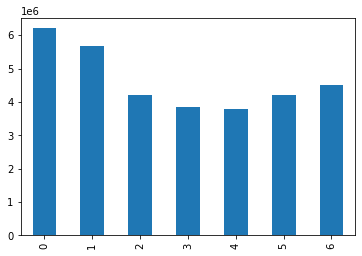

In [6]:
# Create a bar chart sorted on index (0-6)
bar = df['Orders_day_of_week'].value_counts().sort_index().plot.bar()

In [7]:
# Creating histogram to show frequency of prices
# Mark the 5,127 outlier price values as missing as instructed in exercise since they don’t make sense in terms of the other values in the column. 
df.loc[df['prices'] >100, 'prices'] = np.nan

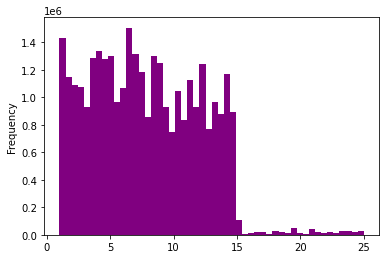

In [8]:
# Retry histogram
hist = df['prices'].plot.hist(bins = 50, color = 'purple')

In [48]:
# create bar chart grouping low_range_items, medium_range_items, and high_range_items
df.loc[df['prices']<5, 'price_range'] = 'low range product'
df.loc[(df['prices']>=5) & (df['prices']<15), 'price_range'] = 'mid range product'
df.loc[df['prices']>=15, 'price_range'] = 'high range product'

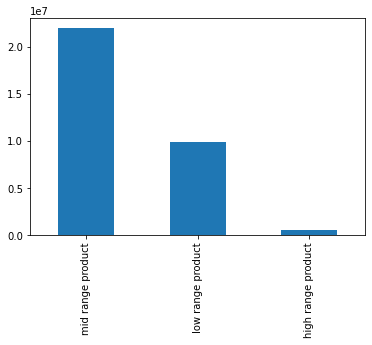

In [49]:
bar2 = df['price_range'].value_counts().plot.bar()

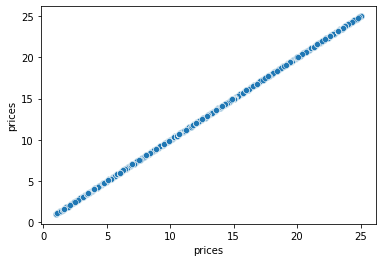

In [9]:
# Creating scatterplot
scatter = sns.scatterplot(x = 'prices', y = 'prices',data = df)

In [10]:
# Create a subset in order to make a line chart 
# Create a list holding true/false values to test np.random.rand() <=0.7
np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [11]:
# check dev to verrify it is boolean 
dev

array([False,  True, False, ...,  True,  True,  True])

In [12]:
# Store 70% of the sample in data frame big
big = df[dev]

In [13]:
# Store 30% of the sample in data frame small
small = df[~dev]

In [14]:
# Checking length is correct
len(big)+len(small)

32404859

In [15]:
# Create new data frame with just the columns needed for the line chart
df_small = small[['Orders_day_of_week','prices']]

In [16]:
# Check df_small
df_small

,Orders_day_of_week,prices
0,2,9.0
2,3,9.0
3,4,9.0
6,1,9.0
10,2,12.5
...,...,...
32404841,2,10.7
32404842,6,10.7
32404843,0,10.7
32404849,1,10.7


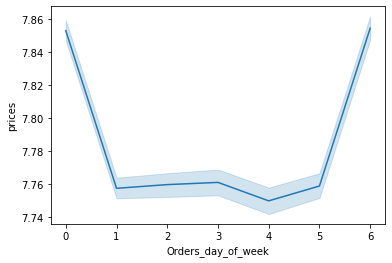

In [17]:
# Create line chart on 30% of df sample
line = sns.lineplot(data = df_small, x = 'Orders_day_of_week',y = 'prices')

 # Histogram of the “order_hour_of_day” column

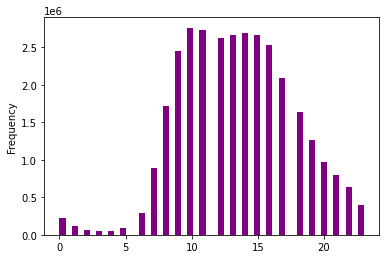

In [18]:
# Create a histogram of the “order_hour_of_day” column
hist2 = df['Order_time_of_day'].plot.hist(bins = 50, color = 'purple')

The busiest time of day is between 10-11 am . Business begins to slow down after 5 pm until about 7 or 8 am the next day. 

# Bar chart from the “loyalty_flag” column

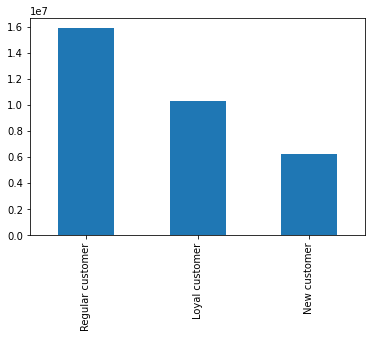

In [19]:
# Create a bar chart from the “Loyalty_flag” column.
bar = df['Loyalty_flag'].value_counts().plot.bar()

Customers that have placed between 10-40 orders are grouped as Regular Customers and are our most common customer.   

In [20]:
# Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. 
# Create a df with just the columns needed
df_small_2 = small[['Order_time_of_day','prices']]

In [21]:
# check df 
df_small_2

,Order_time_of_day,prices
0,8,9.0
2,12,9.0
3,7,9.0
6,9,9.0
10,8,12.5
...,...,...
32404841,12,10.7
32404842,3,10.7
32404843,1,10.7
32404849,18,10.7


#  Line chart of prices to  check the difference in expenditure

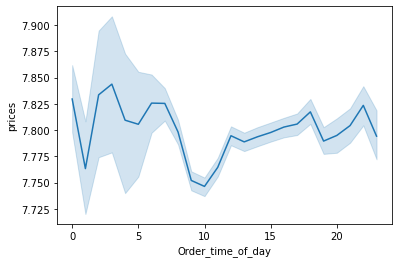

In [22]:
# Create line chart on 30% of df sample
line_2 = sns.lineplot(data = df_small_2, x = 'Order_time_of_day',y = 'prices')

It looks like customers are actually spending more in the morning even though the frequency of orders was shown to be low. Customers are making more orders in the afternoon but they are spending less. The highest expenditure is happening between 12am- 7am, with the lowest expenditure between 10-11 am. 

#  Exploratory analysis of customer demographics 

In [23]:
# Determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:
# # Creating new data frame with just the columns needed for the line chart
df_small_3 = small[['Age','#_of_dependants']]

In [24]:
# Check df 
df_small_3

,Age,#_of_dependants
0,31,3
2,31,3
3,31,3
6,31,3
10,31,3
...,...,...
32404841,25,0
32404842,25,0
32404843,25,0
32404849,25,0


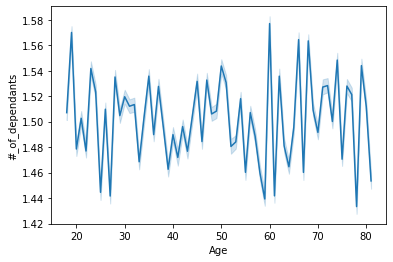

In [25]:
line_3 = sns.lineplot(data = df_small_3, x = 'Age',y = '#_of_dependants')

There is not a strong relationship between age and dependants. However, after around 60 yrs old, customers do tend to have a slightly higher percentage of dependants. All together no clear trend is apparent. 

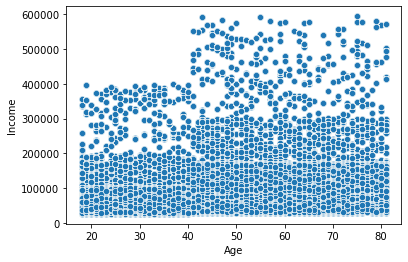

In [26]:
#explore whether there’s a connection between age and spending power (income).
scatter_2 = sns.scatterplot(x = 'Age', y = 'Income', data = df)

We can see from 20-40 years old the income is generally under 200,000. At 40 years old the income jumps up another 100,000 and stays mostly around 300,000 through to 80 years old. This shows that the spending ability of 40+ year old customers is higher, reaching even up to 6000,000. While the highest spending ability of under 40 yr olds is 400,000.

# Export 

In [27]:
# Exporting charts to folder as image
bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_orders_dow2.png'))

In [28]:
hist.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'hist_exp.png'))

In [29]:
hist2.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'exp_hour_of_day.png'))

In [30]:
scatter.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'scatter_prices.png'))

In [31]:
line.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'line_dow_prices.png'))

In [32]:
bar.figure.savefig(os.path.join(path,  'Analysis','Visualizations', 'bar_loyalty_flag.png'))

In [33]:
line_2.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'line_hour_prices.png'))

In [34]:
line_3.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'line_age_#_of_dependants.png'))

In [35]:
scatter_2.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'age_income.png'))